In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/MLDatasets/'

# check if 'MLDatasets' already exists
if os.path.exists(PATH):
    print('ML datasets directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/mahendran-jinachandran/MLDatasets.git
    print('Cloning ML datasets in your Drive')

# change directory to 'MLDatasets'
%cd /content/drive/MyDrive/MLDatasets/

ML datasets directory already exists
/content/drive/MyDrive/MLDatasets


In [ ]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
# Fetching the shape of the CSV File.
# It has 252,680 rows and 22 columns including the output column
data.shape

(253680, 22)

In [ ]:
# This will give the entire information about the columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Let's view the first five data
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Pre-Processing

In [ ]:
def convert_to_int(column_name):
  data[column_name] = data[column_name].astype(int)

In [ ]:
columns = ["Diabetes_012",	"HighBP",	"HighChol", "CholCheck","BMI","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"]
for column in columns:
  convert_to_int(column)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Check null values

In [ ]:
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Check the unique values in all the features

In [ ]:
# Something wrong with the data
data['Diabetes_012'] = data['Diabetes_012'].replace(2, 1)

In [ ]:
unique_values = {}
for col in data.columns:
    print(data[col].value_counts())
    unique_values[col] = data[col].value_counts().count() # shape can also be used to find the unique values instead of count

pd.DataFrame(unique_values, index=['unique value count']).transpose()

Diabetes_012
0    213703
1     39977
Name: count, dtype: int64
HighBP
0    144851
1    108829
Name: count, dtype: int64
HighChol
0    146089
1    107591
Name: count, dtype: int64
CholCheck
1    244210
0      9470
Name: count, dtype: int64
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
Smoker
0    141257
1    112423
Name: count, dtype: int64
Stroke
0    243388
1     10292
Name: count, dtype: int64
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
PhysActivity
1    191920
0     61760
Name: count, dtype: int64
Fruits
1    160898
0     92782
Name: count, dtype: int64
Veggies
1    205841
0     47839
Name: count, dtype: int64
HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64
AnyHealthcare
1    241263
0     12417
Name: count, dtype: int64
NoDocbcCost
0    232326
1     21354
Name: count, dtype: int64
GenHlth
2    89084
3    75646


,unique value count
Diabetes_012,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Checking the outliers

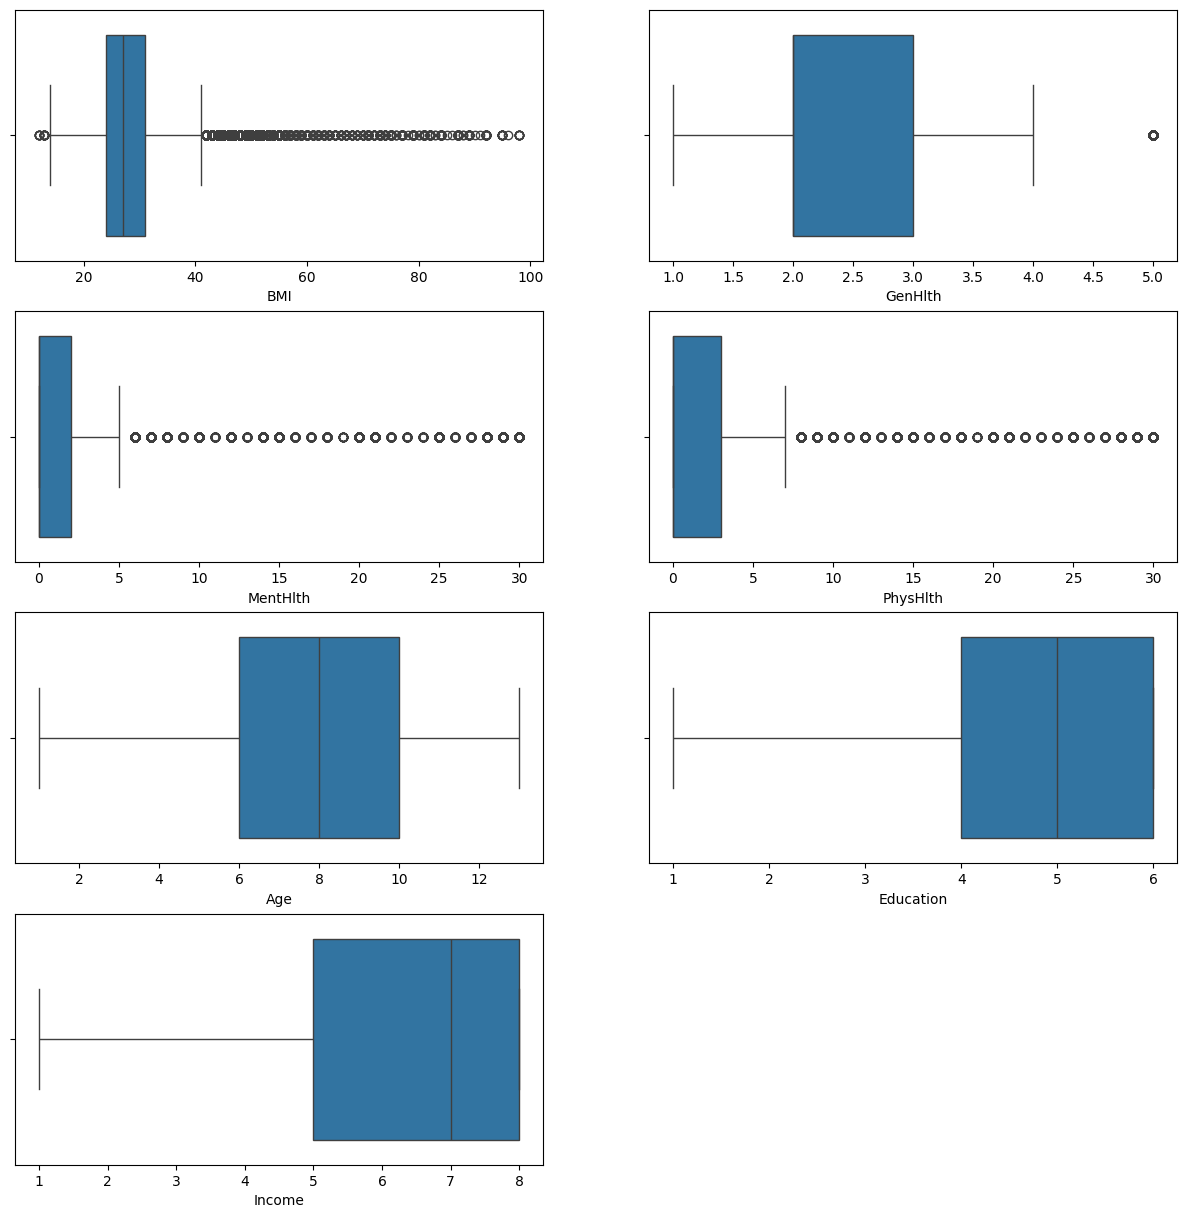

In [ ]:
plt.figure(figsize = (15,15))

# Checking only for these columns because they have non-boolean data
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data)
plt.show()

 BMI, MentHlth, and PhysHlth  show outliers (dots outside the whiskers). However, for other columns, the absence of dots outside the whiskers means no outliers are present for those variables.

In [ ]:
# Gives the number of duplicatd rows in the dataset
data.duplicated().sum()

23968

In [ ]:
# Removes the duplicated rows
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

# EDA (Explaratory Data Analysis)

Text(0.5, 1.0, 'correlation of feature')

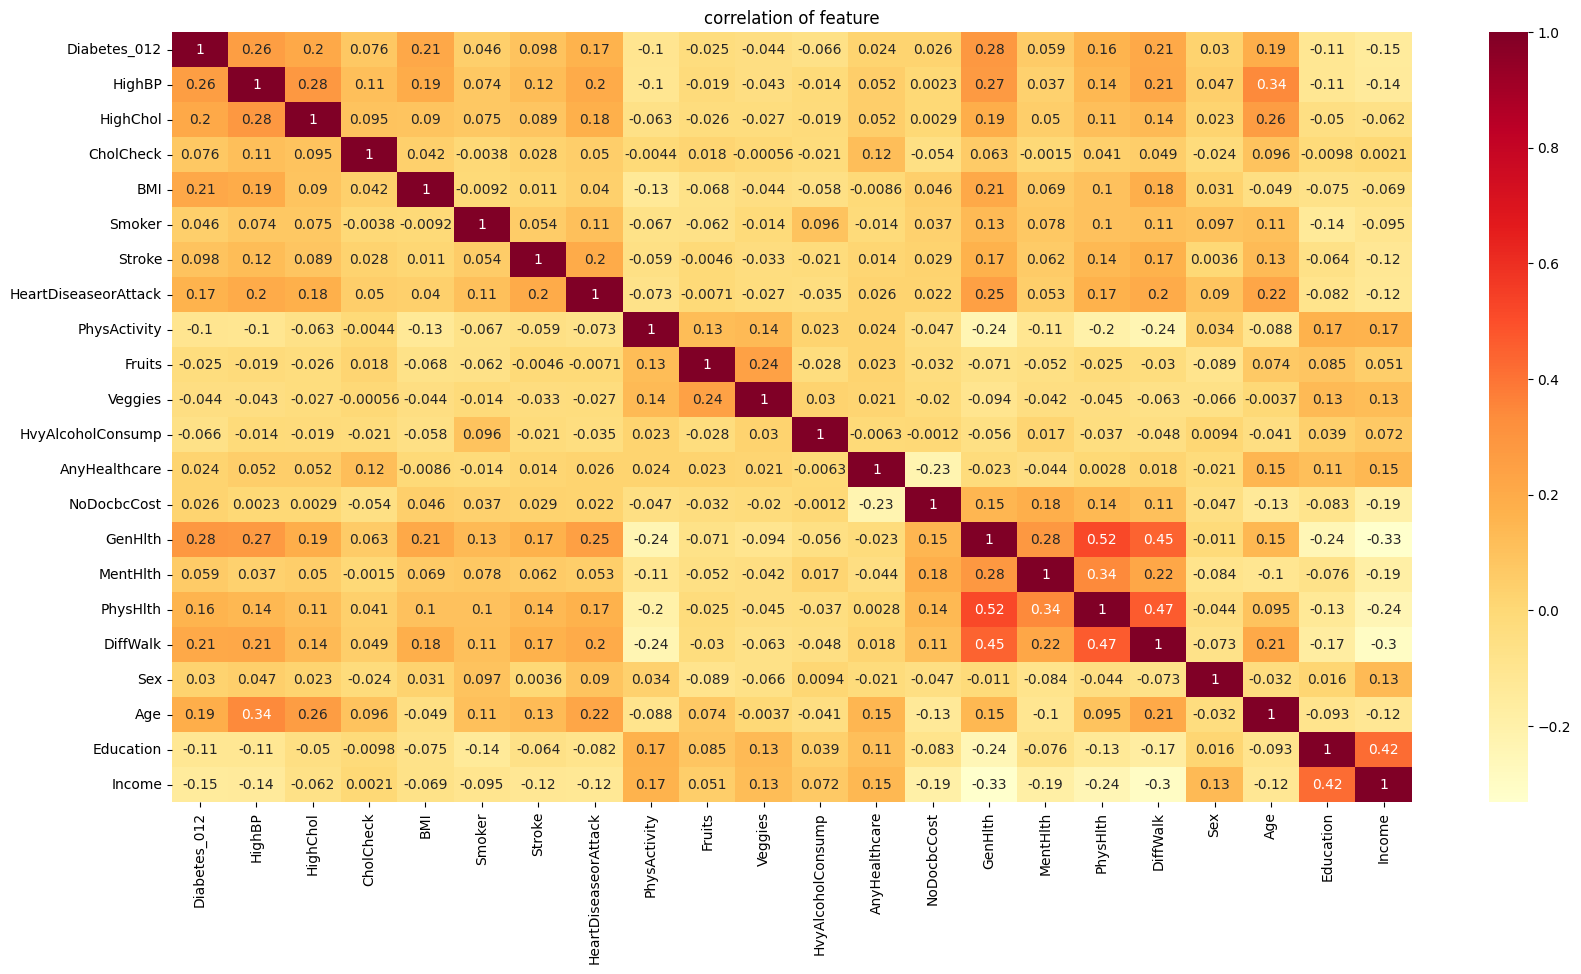

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

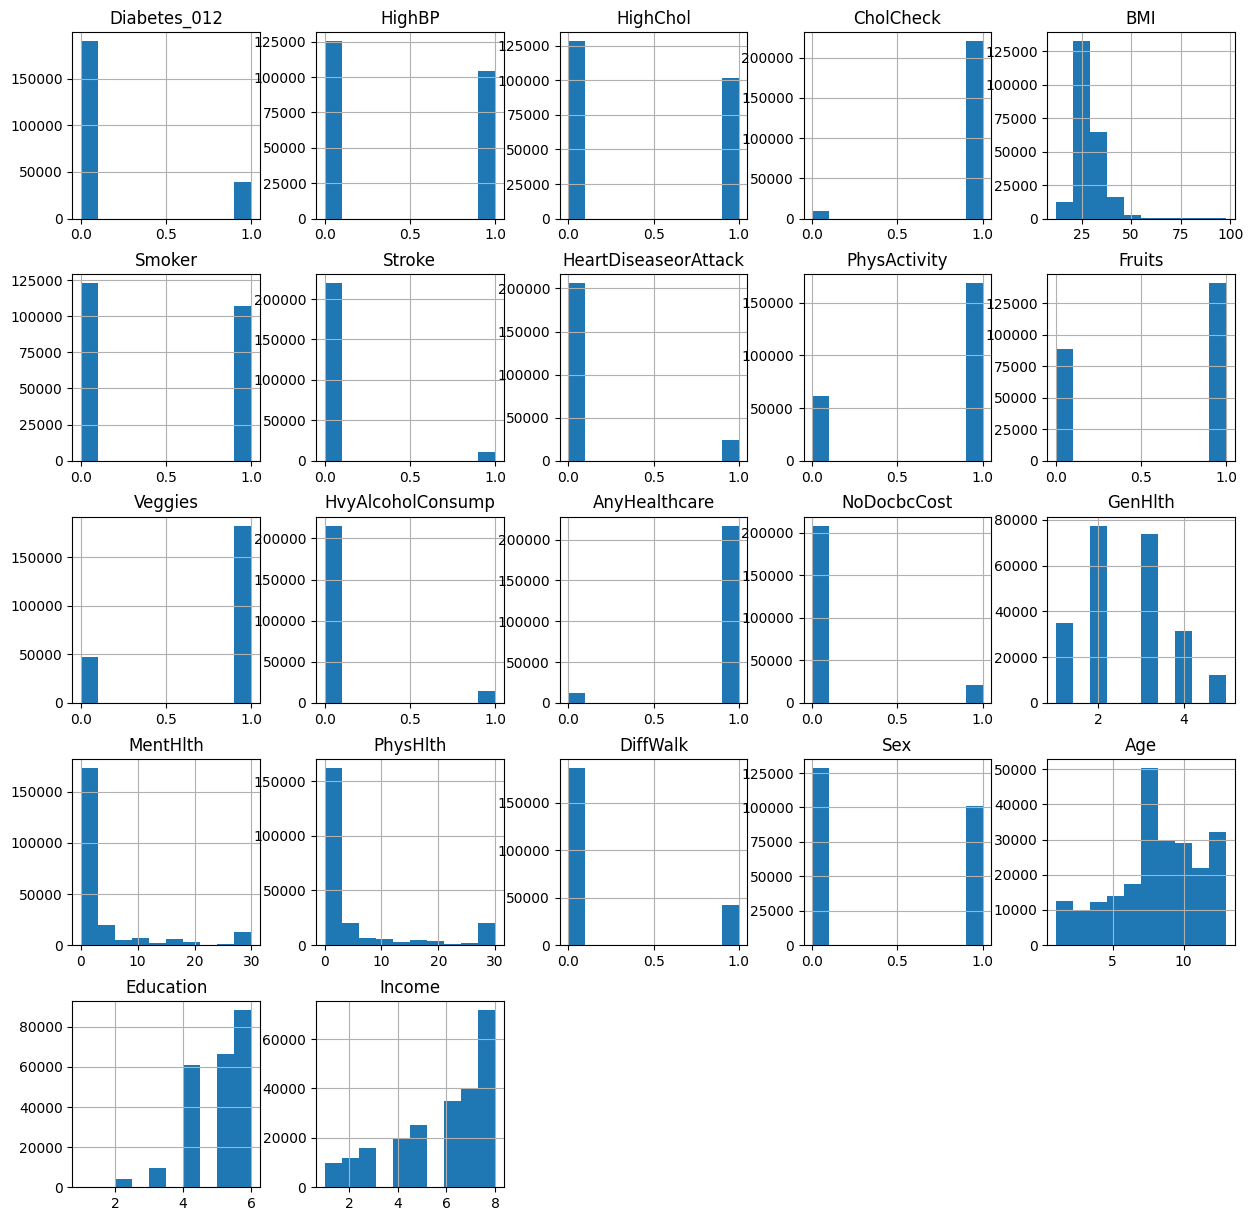

In [ ]:
data.hist(figsize=(15,15))
plt.show()

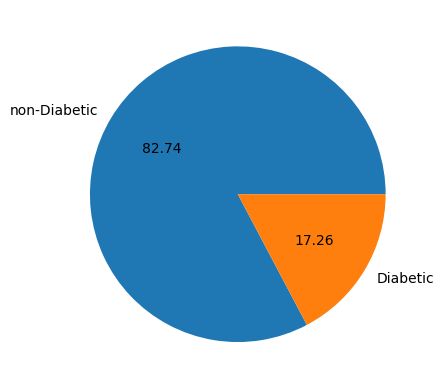

In [ ]:
#checking diabetic and non diabetic pepoles average by pie

labels=["non-Diabetic","Diabetic"]
plt.pie(data["Diabetes_012"].value_counts() , labels =labels ,autopct='%.02f' );

In [ ]:
features_only = data.drop('Diabetes_012', axis=1)

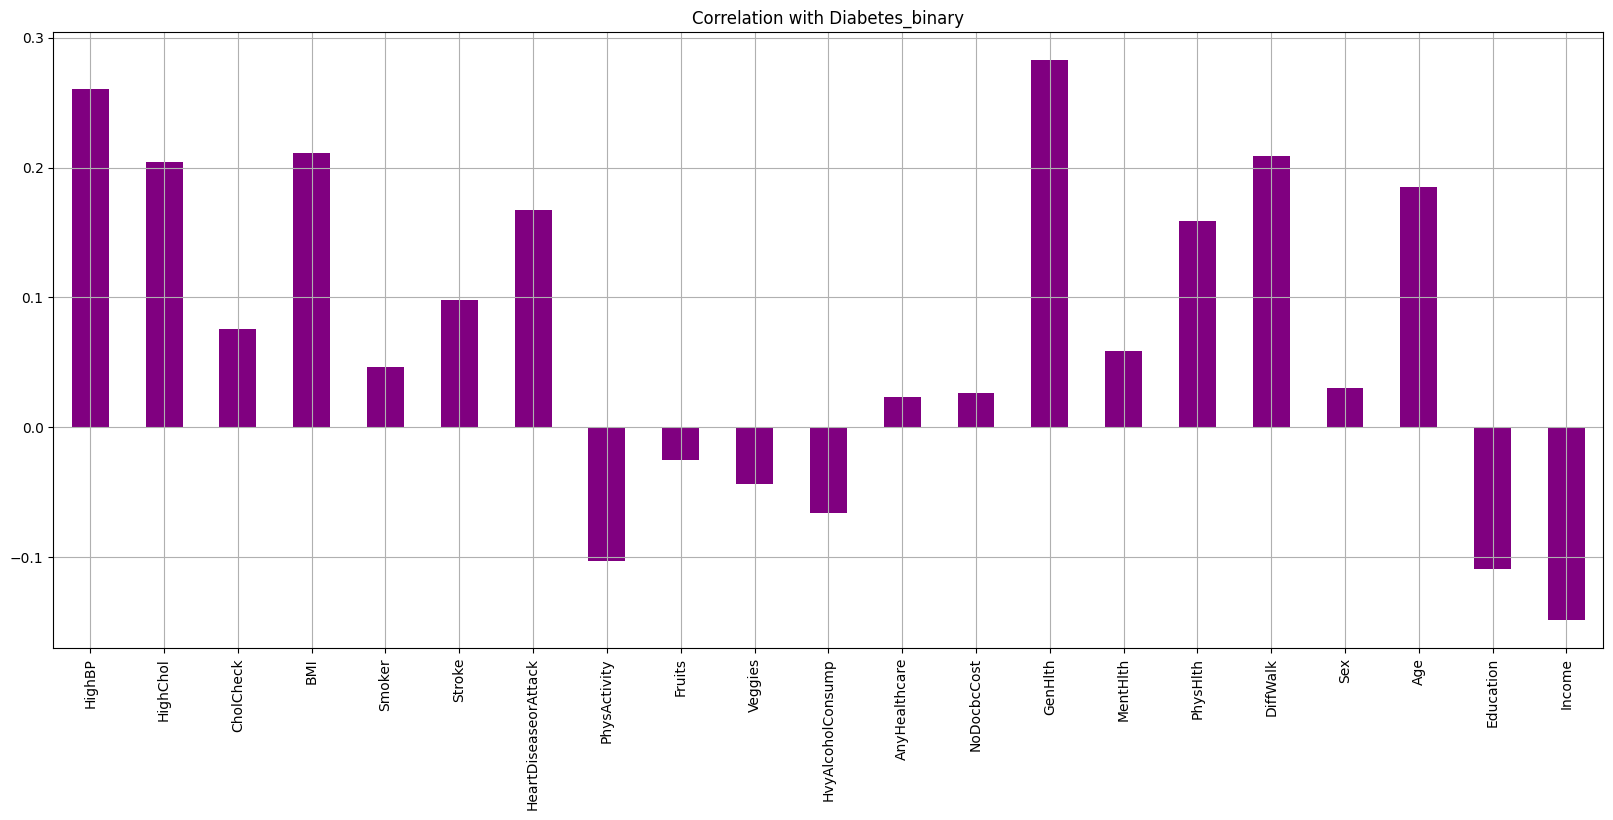

In [ ]:
data_with_corr = features_only.corrwith(data.Diabetes_012)
data_with_corr.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple");

# Feature Selections

VIF Test


The Variance Inflation Factor (VIF) is a test used to detect multicollinearity.

VIF = 1: No correlation between and other predictors, so no multicollinearity.

1 < VIF < 5: Low to moderate correlation; the predictor is not severely collinear with others.

VIF ≥ 5: High correlation, indicating significant multicollinearity.

VIF ≥ 10: Very high multicollinearity, and the predictor should likely be removed or combined with others

In [ ]:
X = add_constant(data)
print(X.shape)

(229712, 23)


In [ ]:
ds = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
print(ds)

const                   109.500762
Diabetes_012              1.193754
HighBP                    1.315411
HighChol                  1.167976
CholCheck                 1.036130
BMI                       1.143750
Smoker                    1.076205
Stroke                    1.077837
HeartDiseaseorAttack      1.169848
PhysActivity              1.130727
Fruits                    1.098085
Veggies                   1.098279
HvyAlcoholConsump         1.027728
AnyHealthcare             1.110008
NoDocbcCost               1.135781
GenHlth                   1.742215
MentHlth                  1.221841
PhysHlth                  1.594588
DiffWalk                  1.514007
Sex                       1.076672
Age                       1.360478
Education                 1.272545
Income                    1.432718
dtype: float64


In [ ]:
coloumns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
data.drop(coloumns , axis= 1 ,inplace=True)

In [ ]:
Y = data["Diabetes_012"]
X = data.drop("Diabetes_012",axis=1)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3 , random_state=42)


# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Prediction

In [ ]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [ ]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8335
Test set score: 0.8332


In [ ]:
#check MSE & RMSE
import math
mse =mean_squared_error(Y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.1667875903299765
Root Mean Squared Error : 0.4083963642467652


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     57056
           1       0.55      0.18      0.27     11858

    accuracy                           0.83     68914
   macro avg       0.70      0.57      0.59     68914
weighted avg       0.80      0.83      0.80     68914



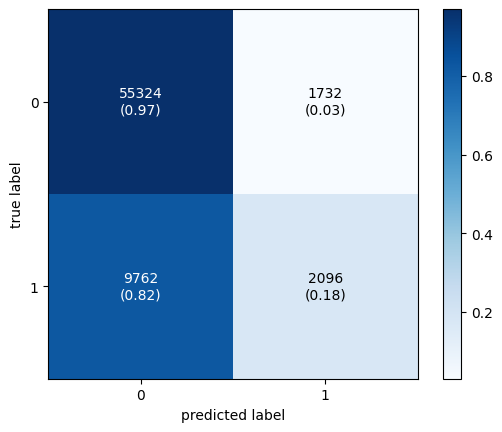

In [ ]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()